In [1]:
import numpy as np
import matplotlib.pyplot as plt

from netCDF4 import Dataset
filename = '/home/eedy/data/aux/IONEX/gps230505g.001.nc'

dataset = Dataset(filename, 'r')
timestamps = dataset.variables['timestamps'][:] #时间，感觉没有，直接后面用间隔5分钟生成图像
lat = dataset.variables['gdlat'][:] #纬度
lon = dataset.variables['glon'][:] #精度
tec = dataset.variables['tec'][:] #这个看起来是我想要的
dataset.close()

utc_min = np.arange(0, 24 * 60, 5)

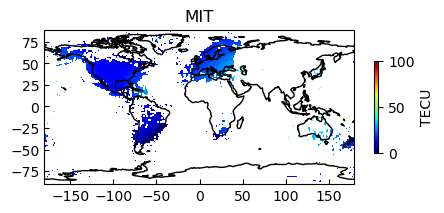

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 创建地图投影
plt.figure(figsize=(5, 3))
ax = plt.axes(projection=ccrs.PlateCarree())

# 绘制图像
im = ax.imshow(tec[72,:,:], cmap='jet', origin='lower',
               extent=[lon.min(), lon.max(), lat.min(), lat.max()],
               transform=ccrs.PlateCarree(),vmax=100,vmin=0)

# 添加海岸线
ax.add_feature(cfeature.COASTLINE)

# 设置坐标轴刻度向内
ax.tick_params(axis='both', direction='in')


# 设置横纵坐标轴刻度
ax.set_xticks(np.arange(-150, 151, 50))
ax.set_yticks(np.arange(-75, 76, 25))

# 添加颜色条
plt.colorbar(im, ax=ax, label='TECU', shrink=0.4)
plt.title('MIT')

plt.savefig('MIT.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()